In [1]:
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold 
#from sklearn.linear_model import Ridge
#from sklearn.metrics import mean_squared_error
#from sklearn.preprocessing import FunctionTransformer
#from sklearn.model_selection import GridSearchCV
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LassoCV
#from sklearn.datasets import make_regression
from sklearn import svm
from sklearn.impute import KNNImputer
from sklearn.feature_selection import SelectKBest, f_classif
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data import Dataset



import seaborn as sb

device = 'cpu'


In [60]:
train_feat = pd.read_csv(r'C:\Users\erics\Documents\Programme\IntroML\Task2\task2_k49am2lqi\train_features.csv')
train_label = pd.read_csv(r'C:\Users\erics\Documents\Programme\IntroML\Task2\task2_k49am2lqi\train_labels.csv')
test_feat = pd.read_csv(r'C:\Users\erics\Documents\Programme\IntroML\Task2\task2_k49am2lqi\test_features.csv')

In [61]:
test_feat

,pid,Time,Age,EtCO2,PTT,BUN,Lactate,Temp,Hgb,HCO3,...,Alkalinephos,SpO2,Bilirubin_direct,Chloride,Hct,Heartrate,Bilirubin_total,TroponinI,ABPs,pH
0,0,1,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,2,39.0,NaN,44.2,17.0,NaN,36.0,10.2,13.0,...,119.0,100.0,NaN,98.0,31.0,82.0,21.8,NaN,119.0,NaN
2,0,3,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,100.0,NaN,NaN,NaN,78.0,NaN,NaN,125.0,7.34
3,0,4,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,100.0,NaN,NaN,NaN,80.0,NaN,NaN,136.0,NaN
4,0,5,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,100.0,NaN,NaN,NaN,83.0,NaN,NaN,135.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151963,9997,8,57.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,100.0,NaN,NaN,NaN,84.0,NaN,NaN,103.0,NaN
151964,9997,9,57.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,100.0,NaN,NaN,NaN,83.0,NaN,NaN,110.0,NaN
151965,9997,10,57.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,100.0,NaN,NaN,NaN,88.0,NaN,NaN,111.0,NaN
151966,9997,11,57.0,NaN,NaN,NaN,NaN,37.0,NaN,NaN,...,NaN,100.0,NaN,NaN,NaN,89.0,NaN,NaN,118.0,NaN


In [62]:
Abgabe = pd.DataFrame({'pid': test_feat.iloc[0::12, 0].values})
Abgabe

,pid
0,0
1,10001
2,10003
3,10004
4,10005
...,...
12659,9989
12660,9991
12661,9992
12662,9994


In [63]:
train_feat = train_feat.sort_values(by=['pid','Time'])
#test_feat = test_feat.sort_values(by=['pid','Time'])
train_label = train_label.sort_values(by=['pid'])

In [64]:
train_feat

,pid,Time,Age,EtCO2,PTT,BUN,Lactate,Temp,Hgb,HCO3,...,Alkalinephos,SpO2,Bilirubin_direct,Chloride,Hct,Heartrate,Bilirubin_total,TroponinI,ABPs,pH
0,1,3,34.0,NaN,NaN,12.0,NaN,36.0,8.7,24.0,...,NaN,100.0,NaN,114.0,24.6,94.0,NaN,NaN,142.0,7.33
1,1,4,34.0,NaN,NaN,NaN,NaN,36.0,NaN,NaN,...,NaN,100.0,NaN,NaN,NaN,99.0,NaN,NaN,125.0,7.33
2,1,5,34.0,NaN,NaN,NaN,NaN,36.0,NaN,NaN,...,NaN,100.0,NaN,NaN,NaN,92.0,NaN,NaN,110.0,7.37
3,1,6,34.0,NaN,NaN,NaN,NaN,37.0,NaN,NaN,...,NaN,100.0,NaN,NaN,NaN,88.0,NaN,NaN,104.0,7.37
4,1,7,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,100.0,NaN,NaN,22.4,81.0,NaN,NaN,100.0,7.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172879,31658,8,60.0,NaN,NaN,NaN,NaN,37.0,NaN,NaN,...,NaN,96.0,NaN,NaN,NaN,71.0,NaN,NaN,127.0,NaN
172880,31658,9,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172881,31658,10,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172882,31658,11,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,96.0,NaN,NaN,NaN,71.0,NaN,NaN,135.0,NaN


In [65]:
train_label

,pid,LABEL_BaseExcess,LABEL_Fibrinogen,LABEL_AST,LABEL_Alkalinephos,LABEL_Bilirubin_total,LABEL_Lactate,LABEL_TroponinI,LABEL_SaO2,LABEL_Bilirubin_direct,LABEL_EtCO2,LABEL_Sepsis,LABEL_RRate,LABEL_ABPm,LABEL_SpO2,LABEL_Heartrate
0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.1,85.4,100.0,59.9
6622,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,20.4,99.1,95.4,65.8
15008,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,17.8,78.8,97.4,71.8
16335,6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,17.9,75.1,97.3,80.7
17676,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.7,112.8,97.0,92.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14402,31653,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.5,97.0,95.3,101.4
14403,31654,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.2,119.2,97.6,91.8
14404,31656,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,21.0,93.8,99.2,92.2
14405,31657,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.8,72.5,98.7,64.0


In [66]:
train_feat_np = train_feat.to_numpy()
siz = int(len(train_feat_np)/12)
#print(siz)

X = np.zeros((siz,37*12))
for pid in range(siz):
    for feature in range(37):
        for time in range(12):
            X[pid,feature*12+time] = train_feat_np[pid*12+time,feature]

In [67]:
tmp = [[val+"_"+str(i) for i in range(12)] for val in train_feat.columns]
keys = []
for sublist in tmp:
    for item in sublist:
        keys.append(item)

X_df = pd.DataFrame(columns=keys, index=range(18995), data = X)

for i in range(1,12):
    X_df.pop("Age_"+str(i))
for i in range(0,12):
    X_df.pop("pid_"+str(i))
    X_df.pop("Time_"+str(i))

In [68]:
X_df

,Age_0,EtCO2_0,EtCO2_1,EtCO2_2,EtCO2_3,EtCO2_4,EtCO2_5,EtCO2_6,EtCO2_7,EtCO2_8,...,pH_2,pH_3,pH_4,pH_5,pH_6,pH_7,pH_8,pH_9,pH_10,pH_11
0,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.37,7.37,7.41,NaN,NaN,NaN,NaN,7.39,7.39,NaN
1,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.33,7.35,7.34,7.39,7.37,7.34,NaN,NaN,NaN
4,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18990,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.33,7.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18991,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18992,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.28,NaN,7.34,NaN,7.33,NaN,NaN,NaN,NaN
18993,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
#print(train_feat)
#train_feat_regroup = train_feat.groupby('pid').agg(lambda x: x.tolist())
#train_feat_regroup
#train_feat_np = train_feat.to_numpy()
#print(train_feat_np)

In [70]:
#train_feat_regroup.shape
#train_feat.groupby('pid').agg(lambda x: print(len(x)) if len(x)==12 else print("problem!!")) #check if all have 12 timestamps or if timestamps are missing

In [71]:
#train_feat_ID = train_feat.iloc[:,0]
#print(train_feat_ID)
#pd.set_option("display.precision", 7)
#print(X)
#print(y)
#print(X.shape)
#print(train_feat.shape)
#print(train_label.shape)

Labels


In [72]:
labels = train_label
labels.pop("pid")

0            1
6622         2
15008        4
16335        6
17676        8
         ...  
14402    31653
14403    31654
14404    31656
14405    31657
14406    31658
Name: pid, Length: 18995, dtype: int64

In [73]:
labels

,LABEL_BaseExcess,LABEL_Fibrinogen,LABEL_AST,LABEL_Alkalinephos,LABEL_Bilirubin_total,LABEL_Lactate,LABEL_TroponinI,LABEL_SaO2,LABEL_Bilirubin_direct,LABEL_EtCO2,LABEL_Sepsis,LABEL_RRate,LABEL_ABPm,LABEL_SpO2,LABEL_Heartrate
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.1,85.4,100.0,59.9
6622,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,20.4,99.1,95.4,65.8
15008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,17.8,78.8,97.4,71.8
16335,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,17.9,75.1,97.3,80.7
17676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.7,112.8,97.0,92.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.5,97.0,95.3,101.4
14403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.2,119.2,97.6,91.8
14404,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,21.0,93.8,99.2,92.2
14405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.8,72.5,98.7,64.0


In [74]:
labels = labels.to_numpy()

New Version of Datahandling

In [75]:
def make_features(data):
    a = []
    calc_feat = [np.nansum,  np.nanmean, np.nanvar,np.nanmedian, np.nanmax, np.nanmin]
    
    for i in range(int(data.shape[0] / 12)):
        data_without = data[i*12 : (i+1) * 12, 2:] #everything after Age 
        features = np.empty((6, data[:, 2:].shape[1]))
        
        for i, feat in enumerate(calc_feat):
            features[i] = feat(data_without, axis=0)
        a.append(features)
    return np.asarray(a)

In [76]:
train_feat_new = make_features(train_feat.to_numpy())
test_feat_new = make_features(test_feat.to_numpy())

C:\Users\erics\AppData\Local\Temp/ipykernel_17480/3460267293.py:10: RuntimeWarning: Mean of empty slice
  features[i] = feat(data_without, axis=0)
C:\Users\erics\AppData\Local\Temp/ipykernel_17480/3460267293.py:10: RuntimeWarning: Degrees of freedom <= 0 for slice.
  features[i] = feat(data_without, axis=0)
C:\Users\erics\anaconda3\envs\IML\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
C:\Users\erics\AppData\Local\Temp/ipykernel_17480/3460267293.py:10: RuntimeWarning: All-NaN slice encountered
  features[i] = feat(data_without, axis=0)


In [77]:
train_feat_new = np.resize(train_feat_new, ((18995, 210)))
train_feat_new.shape

(18995, 210)

In [78]:
test_feat_new = np.resize(test_feat_new, ((12664, 210)))
print(test_feat_new.shape)

(12664, 210)


In [48]:
np.isnan(train_feat_new)

array([[False, False, False, ...,  True, False, False],
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False,  True],
       ...,
       [False, False, False, ...,  True, False, False],
       [False, False, False, ...,  True, False,  True],
       [False, False, False, ...,  True, False,  True]])

In [57]:
imputer = KNNImputer(n_neighbors=3, weights='distance')
train_feat_new2 = imputer.fit_transform(train_feat_new)

In [58]:
np.save("X_imputed_3_distance", train_feat_new2)

In [79]:
train_feat_new2 = np.load("X_imputed_3_distance.npy")

In [80]:
imputer = KNNImputer(n_neighbors=3, weights='distance')
test_feat_new2 = imputer.fit_transform(test_feat_new)
np.save("X_test_imputed_3_distance.npy", test_feat_new2)

In [148]:
from sklearn.impute import SimpleImputer
imputer2 = SimpleImputer(strategy='median')
train_feat_new2MEDIAN = imputer2.fit_transform(train_feat_new)

Check if we can drop some variables
---


In [50]:
Train_feat_corr = train_feat.corr()
Train_label_corr = train_label.corr()
#print(Train_corr)

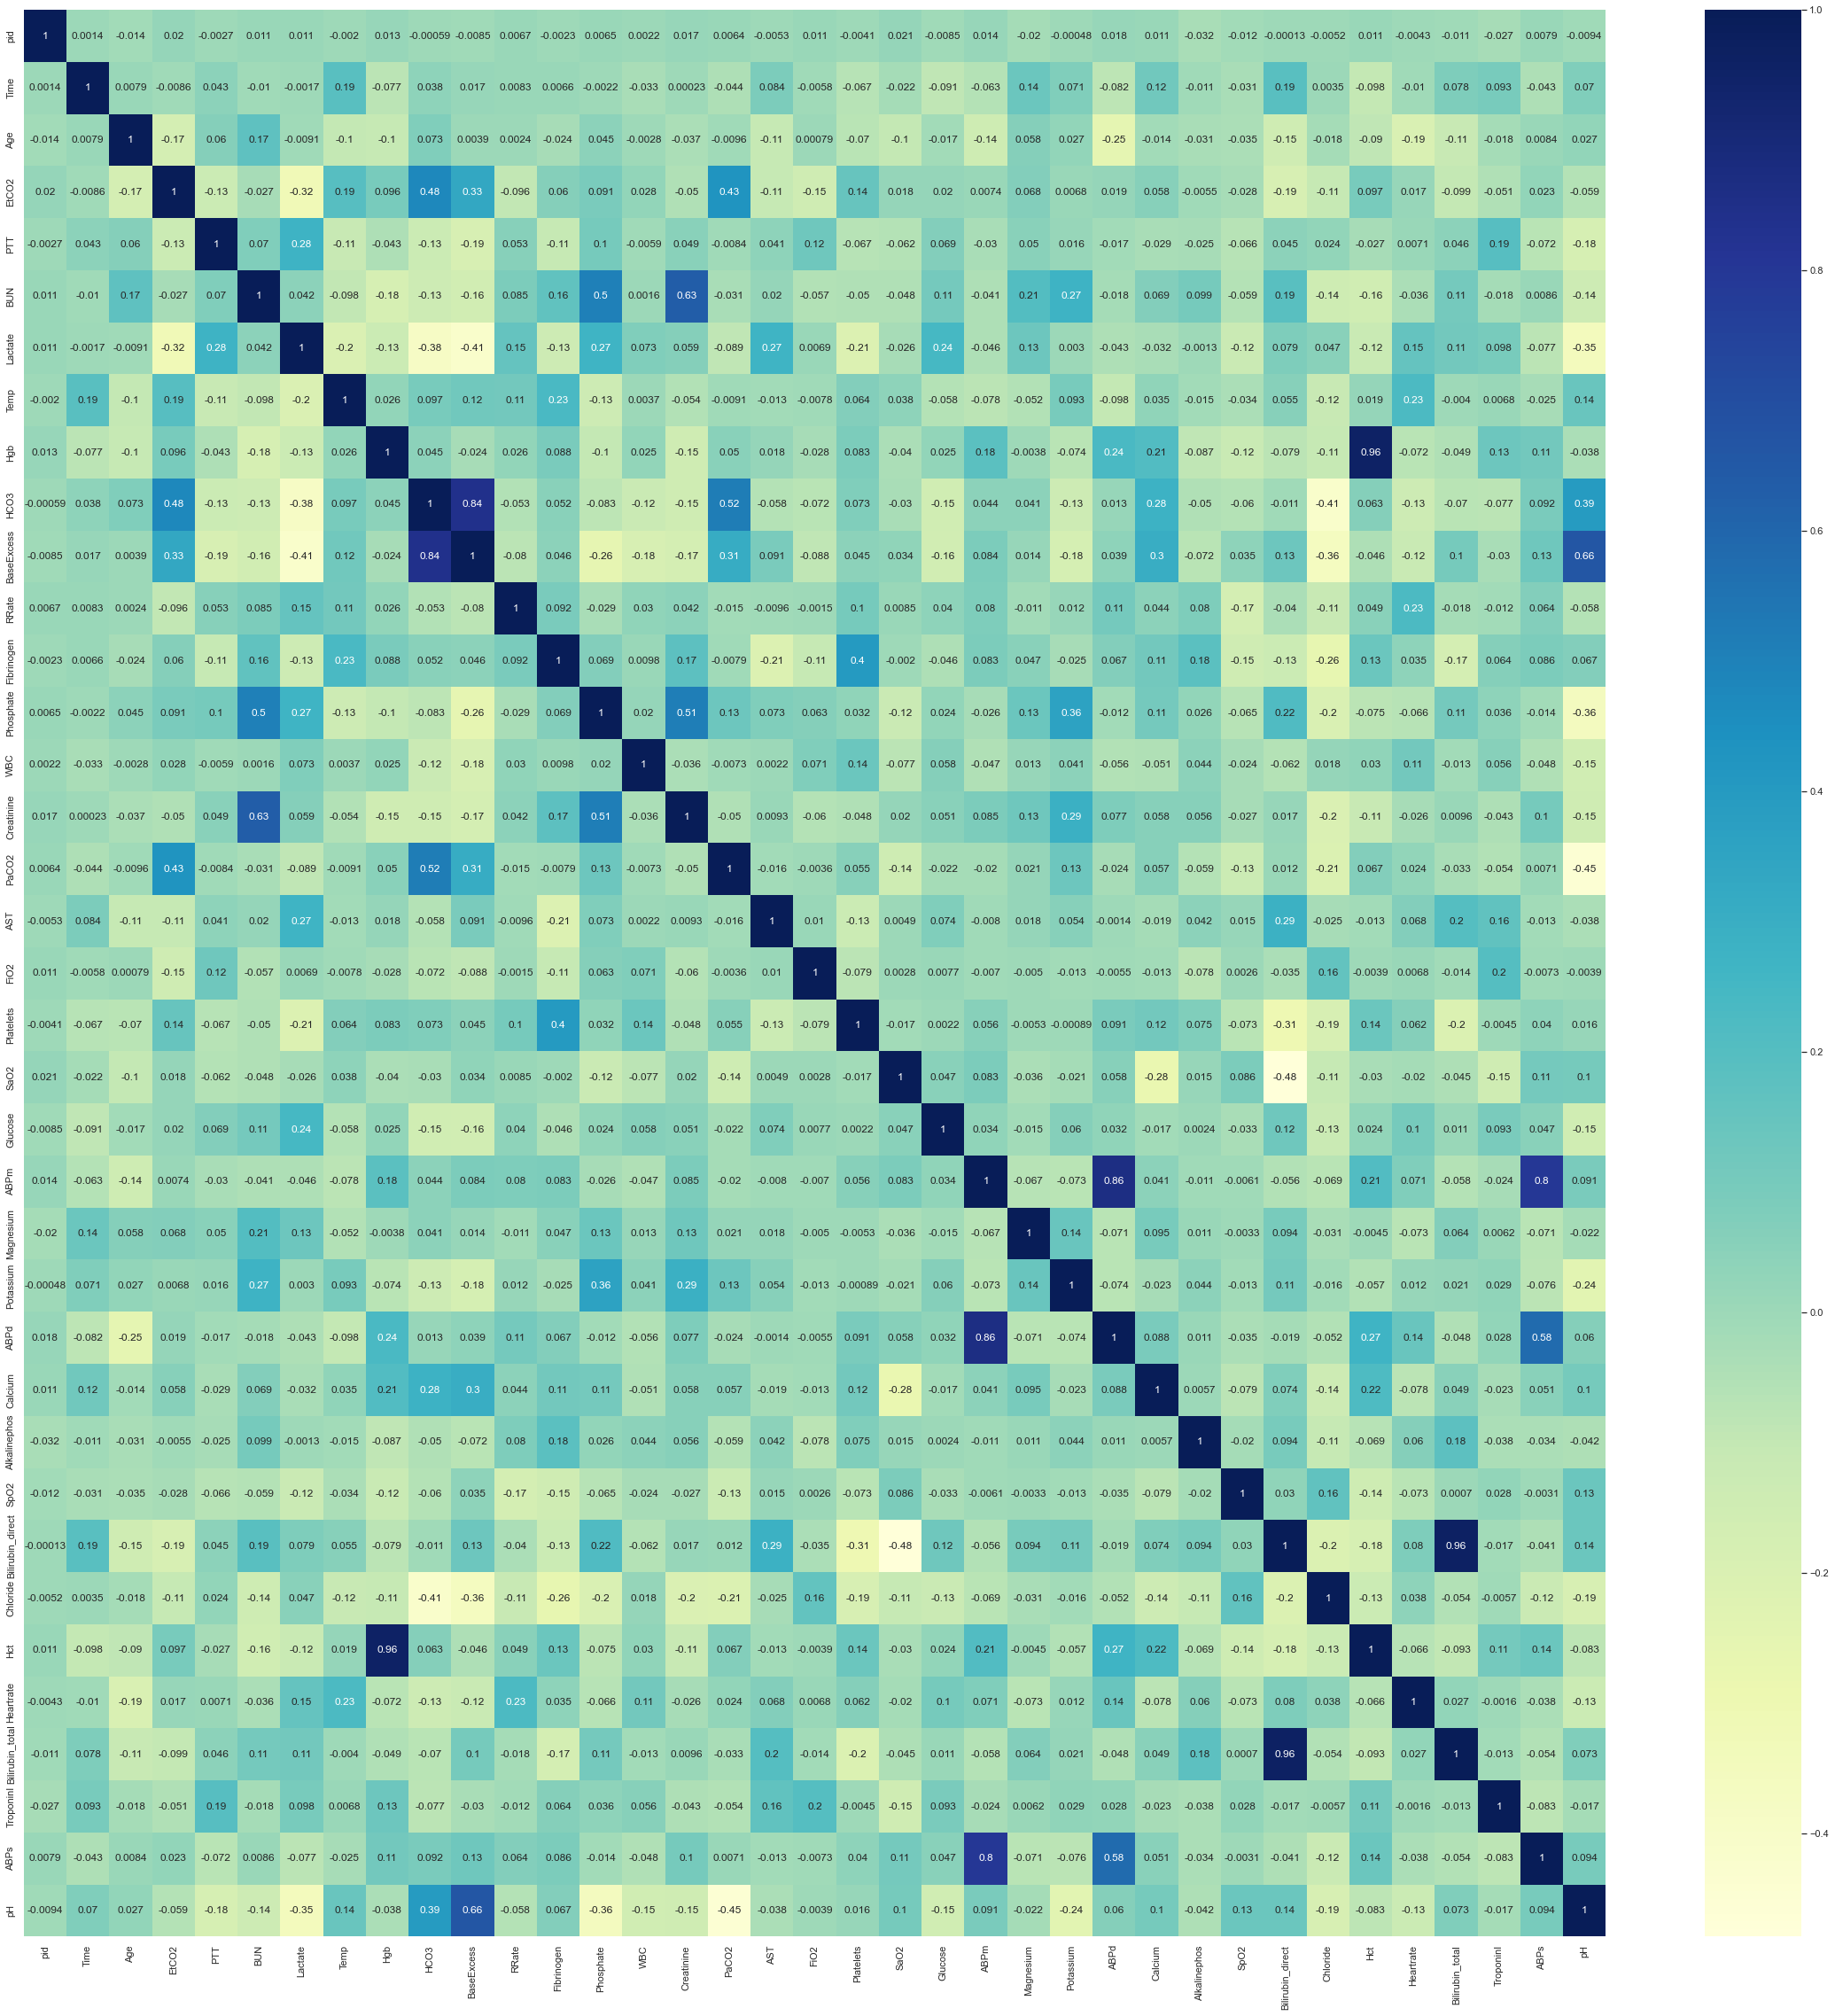

In [51]:
sb.set(rc={"figure.figsize":(40, 40)}) #width=8, height=4
dataplot = sb.heatmap(Train_feat_corr, cmap="YlGnBu", annot=True)
#plt.show()

In [52]:
#dataplot = sb.heatmap(Train_label_corr, cmap="YlGnBu", annot=True)


We should not drop any (perhaps the ones with 0.96 and higher)

Imputing
---

In [15]:
X = X_df.to_numpy()
imputer = KNNImputer(n_neighbors=5, weights='distance')
X = imputer.fit_transform(X)

KeyboardInterrupt: 

In [ ]:
np.save("X_imputed_5_distance", X)

In [16]:
X = np.load("X_imputed_5_distance.npy")

Select best


In [17]:
X

array([[34.        , 32.60228939, 41.6680379 , ...,  7.39      ,
         7.39      ,  7.39945682],
       [86.        , 31.40616527, 33.3587295 , ...,  7.39478639,
         7.42435456,  7.36834045],
       [66.        , 31.79237142, 25.44617511, ...,  7.35127753,
         7.35857148,  7.36725933],
       ...,
       [44.        , 35.70095635, 38.44675069, ...,  7.36537573,
         7.3535082 ,  7.40570393],
       [70.        , 39.63256588, 30.48125431, ...,  7.4084859 ,
         7.4005019 ,  7.41998923],
       [60.        , 28.91564942, 36.7996794 , ...,  7.39038287,
         7.4061481 ,  7.39326963]])

In [18]:
y = labels[:, 0] #try to predict one label

In [19]:
X_new = SelectKBest(f_classif, k=20).fit_transform(X, y)
X_new

array([[ 37.39773566,   8.7       ,   0.90339073, ..., 100.        ,
        114.        ,  24.6       ],
       [ 36.45186836,  12.21801468,   0.72009564, ...,  97.86897384,
        102.77906441,  35.74236086],
       [ 37.        ,  12.69527356,   0.66341025, ...,  95.47791836,
        107.34653149,  37.99001814],
       ...,
       [ 37.01105313,  10.14717016,   0.65899954, ...,  99.25903043,
        110.74019973,  30.82294324],
       [ 36.39399629,  12.39301514,   0.71162668, ...,  97.21095053,
        106.42706771,  38.48213605],
       [ 36.1667517 ,  13.03393798,   0.7917234 , ..., 100.        ,
        108.78189104,  38.82028775]])

Subtask 1
---

try a linear network. Falls wir alle inputdimensionen gleichzeitig reingeben müssen ist eine svm besser, da wir dann nicht genügend Daten haben für ein lin netzwerk ~13Mio parameter für 2 layer FC -> weitere Idee sind LSTM nutzen (aber kompliziert)

In [185]:
class CustomDataset(Dataset):
    def __init__(self, X, labels, batch_size=64, transform=None, target_transform=None):
        self.labels = labels
        self.X = X
        self.batch_size = batch_size
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        data = self.X[idx]
        label = self.labels[idx, 0]
        if self.transform:
            image = self.transform(data)
        if self.target_transform:
            label = self.target_transform(label)
        return data, label

In [186]:
class Linear2(nn.Module):
    def __init__(self, in_Dim, out_Dim):
        super(Linear2, self).__init__()
 
        self.lin0 = nn.Linear(in_features=in_Dim, out_features=512)
        self.lin1 = nn.Linear(in_features=512, out_features=out_Dim)
        
 
    def forward(self, x):
        x = self.lin0(x)
        x = F.relu(x)
        prediction = torch.sigmoid(self.lin1(x))
        return prediction

Learning parameters

In [187]:
epochs = 10
batch_size = 64
lr = 0.0001
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [188]:
model = Linear2(X.shape[1], 1 ).to(device) #labels.shape[1] ).to(device)
print(model)

Linear2(
  (lin0): Linear(in_features=409, out_features=512, bias=True)
  (lin1): Linear(in_features=512, out_features=1, bias=True)
)


In [230]:
opt = optim.Adam(model.parameters(), lr=lr)
loss = nn.BCELoss()

In [232]:
train_data = X[:-2000]
val_data = X[-2000:]
print(len(train_data))

train_data = train_data.astype(dtype=np.float32)
val_data = val_data.astype(dtype=np.float32)
y = y.astype(dtype=np.float32)
print(train_data.dtype)
print(val_data.dtype)

16995
float32
float32


In [191]:
train_loader = CustomDataset(
    train_data,
    y,
    batch_size=batch_size,
)
val_loader = CustomDataset(
    val_data,
    y,
    batch_size=batch_size,
)

In [239]:
def fit(model, X, labels, loss):
    X.to(device)
    labels.to(device)
    model.train
    running_loss = 0.0
   
    #for i in range(len(labels)):
    print(X.size())
    opt.zero_grad()

    inp = model(X)        

    output = loss(inp, labels)


    running_loss += output.item()
    output.backward()

    opt.step()
        
    train_loss = running_loss
    return train_loss

In [240]:
def validate(model, X, labels, loss):
    X.to(device)
    labels.to(device)
    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        #for i in range(len(labels)):
       
        opt.zero_grad()

        inp = model(X)        

        output = loss(inp, labels)



        running_loss += output.item()
            
    val_loss = running_loss
    return val_loss

In [241]:
train_loss = []
val_loss = []
torch.backends.cudnn.benchmark = True #choose best kernel for computation

for epoch in range(epochs):
    print(f"Epoch {epoch+1} of {epochs}")

    train_epoch_loss = fit(model, torch.from_numpy(train_data), torch.from_numpy(y[:-2000]), loss)
    val_epoch_loss = validate(model, torch.from_numpy(val_data), torch.from_numpy(y[-2000:]), loss)
    
    train_loss.append(train_epoch_loss)
    val_loss.append(val_epoch_loss)
    print(f"Train Loss: {train_epoch_loss:.4f}")
    print(f"Val Loss: {val_epoch_loss:.4f}")

Epoch 1 of 10
torch.Size([16995, 409])
Train Loss: 1.7667
Val Loss: 1.9037
Epoch 2 of 10
torch.Size([16995, 409])


C:\Users\erics\anaconda3\envs\IML\lib\site-packages\torch\nn\modules\loss.py:529: UserWarning: Using a target size (torch.Size([2000])) that is different to the input size (torch.Size([2000, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


Train Loss: 1.9934
Val Loss: 1.8781
Epoch 3 of 10
torch.Size([16995, 409])
Train Loss: 1.9613
Val Loss: 1.6657
Epoch 4 of 10
torch.Size([16995, 409])
Train Loss: 1.7070
Val Loss: 1.5640
Epoch 5 of 10
torch.Size([16995, 409])
Train Loss: 1.5673
Val Loss: 1.5439
Epoch 6 of 10
torch.Size([16995, 409])
Train Loss: 1.6047
Val Loss: 1.5758
Epoch 7 of 10
torch.Size([16995, 409])
Train Loss: 1.6214
Val Loss: 1.5088
Epoch 8 of 10
torch.Size([16995, 409])
Train Loss: 1.5574
Val Loss: 1.4595
Epoch 9 of 10
torch.Size([16995, 409])
Train Loss: 1.4856
Val Loss: 1.4676
Epoch 10 of 10
torch.Size([16995, 409])
Train Loss: 1.5180
Val Loss: 1.5338


Evaluate

In [248]:
out = model.forward( torch.from_numpy(val_data))
out = torch.round(out) #round to nearest 0 or 1
out

tensor([[0.],
        [0.],
        [0.],
        ...,
        [1.],
        [1.],
        [1.]], grad_fn=<RoundBackward>)

In [256]:
len(y[-2000:])

2000

In [259]:
loss(out, torch.from_numpy(y[-2000:]))

tensor(42.3000, grad_fn=<BinaryCrossEntropyBackward>)

In [261]:
# Number of wrong elements
val_labels = y[-2000:]
wrong = 0
for i in range(len(val_labels)):
    if(out[i] != val_labels[i]):
        wrong += 1
        
print(wrong)

846


In [118]:
def r2_loss(output, target):
    target_mean = torch.mean(target)
    ss_tot = torch.sum((target - target_mean) ** 2)
    ss_res = torch.sum((target - output) ** 2)
    r2 = 1 - ss_res / ss_tot
    return r2

In [274]:
ty = torch.from_numpy(y[-2000:])
r2_loss(out, torch.from_numpy(y[-2000:]))

tensor(-4632.6968, grad_fn=<RsubBackward1>)

SVM
---
10 Fold CV with SVM


In [17]:
k = 10
kf = KFold(n_splits=k, random_state=None)

avg_acc = []
model = svm.SVC()
acc_score = []

In [84]:
for train_index , test_index in kf.split(X_new):
    X_train , X_test = X_new[train_index,:],X_new[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]

    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)

    acc = np.sqrt(mean_squared_error(pred_values , y_test))
    acc_score.append(acc)

avg_acc_score = sum(acc_score)/k
avg_acc.append(avg_acc_score)

In [85]:
avg_acc

[0.5178710112444053]

Alles false setzen

In [86]:
1-y.sum()/y.size

0.7317188733877336

Neue Features
---
Zähle wieviele Male, dass ein Test gemacht wurde und nutze diese Matrix

In [20]:
train_feat_regroup = train_feat.groupby('pid').agg(lambda x: x.count()).reset_index()

In [21]:
train_feat_regroup.pop("Age")
train_feat_regroup.pop("Time")

0        12
1        12
2        12
3        12
4        12
         ..
18990    12
18991    12
18992    12
18993    12
18994    12
Name: Time, Length: 18995, dtype: int64

In [22]:
train_feat_regroup.pop("pid")

0            1
1            2
2            4
3            6
4            8
         ...  
18990    31653
18991    31654
18992    31656
18993    31657
18994    31658
Name: pid, Length: 18995, dtype: int64

In [23]:
train_feat_regroup

,EtCO2,PTT,BUN,Lactate,Temp,Hgb,HCO3,BaseExcess,RRate,Fibrinogen,...,Alkalinephos,SpO2,Bilirubin_direct,Chloride,Hct,Heartrate,Bilirubin_total,TroponinI,ABPs,pH
0,0,0,3,0,8,3,3,6,12,0,...,0,12,0,3,6,12,0,0,12,7
1,0,1,1,0,3,1,0,0,11,0,...,0,11,0,0,1,11,0,1,11,0
2,0,1,2,0,3,2,0,0,11,0,...,1,11,1,0,2,11,1,1,11,0
3,0,1,2,2,12,6,2,7,12,0,...,0,12,0,2,10,12,0,0,12,7
4,0,0,1,0,3,0,0,0,11,0,...,0,10,0,0,0,11,0,1,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18990,0,1,3,4,2,3,3,2,11,1,...,0,11,0,3,5,11,0,0,6,2
18991,0,0,2,0,2,1,0,0,11,0,...,0,11,0,0,1,11,0,0,11,0
18992,0,0,1,0,3,1,1,4,10,0,...,0,10,0,1,1,10,0,0,10,4
18993,0,0,0,0,2,0,0,0,6,0,...,0,10,0,0,0,10,0,0,10,0


In [24]:
train_feat_regroupNP = train_feat_regroup.to_numpy()

SVM 10 CV

In [53]:
from sklearn.metrics import r2_score
k = 10
kf = KFold(n_splits=k, random_state=None)

avg_acc = []
#model = svm.SVC()
acc_score = []

y = labels[:, 0] #try to predict one label

In [63]:
for train_index , test_index in kf.split(train_feat_regroup):
    model = svm.SVC()
    X_train , X_test = train_feat_regroupNP[train_index,:], train_feat_regroupNP[test_index,:]
    #X_train , X_test = train_feat_new2[train_index,:], train_feat_new2[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]

    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)

    #acc = np.sqrt(mean_squared_error(pred_values , y_test))
    acc = r2_score(y_test, pred_values)
    acc_score.append(acc)

avg_acc_score = sum(acc_score)/k
avg_acc.append(avg_acc_score)

In [64]:
acc_score

[-0.3764823198524221,
 -0.3639626704953336,
 -0.4208718597930654,
 -0.3510618920986488,
 -0.37450492446812245,
 -0.3649644160972769,
 -0.35421536521014607,
 -0.35449358059914404,
 -0.3701298701298701,
 -0.37326712216328795,
 0.4021071004502028,
 0.36509824410868097,
 0.40881581547895673,
 0.3133947761465883,
 0.42462584557148364,
 0.36337628023921476,
 0.3489877453249399,
 0.3486439320660052,
 0.3723576618313461,
 0.33620943410111137]

In [65]:
avg_acc

[-0.37039540209073174, -0.0020337185588787388]

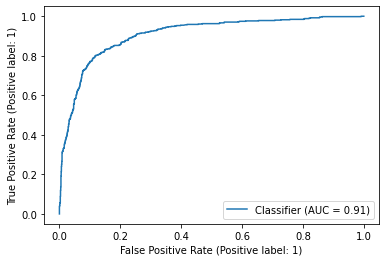

In [66]:
from sklearn.metrics import RocCurveDisplay
y_pred = model.decision_function(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.show()

In [39]:
from sklearn.metrics import roc_auc_score
y_pred = model.decision_function(X_test)
roc_auc_score(y_test, y_pred)

0.9077484900117176

In [40]:
import pickle

# save
with open('model.pkl','wb') as f:
    pickle.dump(model,f)


In [40]:
import pickle
# load
with open('model.pkl', 'rb') as f:
    clf2 = pickle.load(f)

clf2.predict(train_feat_regroupNP[0:1])

array([1.])

Test other labels

In [60]:
from sklearn.metrics import r2_score
k = 10
kf = KFold(n_splits=k, random_state=None)

avg_acc = []
#model = svm.SVC()
acc_score = []

y = labels[:, 8] #try to predict one label

In [61]:
for train_index , test_index in kf.split(train_feat_regroup):
    model = svm.SVC()
    X_train , X_test = train_feat_regroupNP[train_index,:], train_feat_regroupNP[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]

    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)

    #acc = np.sqrt(mean_squared_error(pred_values , y_test))
    acc = r2_score(y_test, pred_values)
    acc_score.append(acc)

avg_acc_score = sum(acc_score)/k
avg_acc.append(avg_acc_score)
acc_score

[-0.03317020119630287,
 -0.03317020119630265,
 -0.034858387799564294,
 -0.03711790393013126,
 -0.037684325505189076,
 -0.028710725893824618,
 -0.03375068045726759,
 -0.03375068045726759,
 -0.04226125137211856,
 -0.03657205240174699]

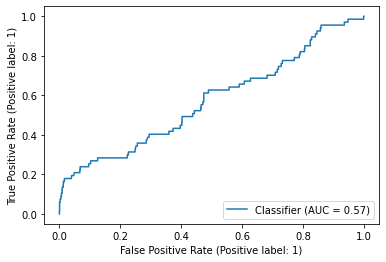

In [62]:
from sklearn.metrics import RocCurveDisplay
y_pred = model.decision_function(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.show()

In [63]:
from sklearn.metrics import roc_auc_score
X_test = train_feat_regroup[:1000]
y_test = labels[:1000, 4]

y_pred = model.predict(X_test)
roc_auc_score(y_test, y_pred)

0.5

Make for multiple classes
    
        

In [28]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_feat_regroupNP)
train_feat_regroupNP2 = scaler.transform(train_feat_regroupNP)
y = labels[:,:10]
model = MultiOutputClassifier(svm.SVC()).fit(train_feat_regroupNP2, y)

In [29]:
from sklearn.metrics import roc_auc_score
X_test = train_feat_regroupNP2
y_test = labels[:,:10]

y_pred = model.predict(X_test)
roc_auc_score(y_test, y_pred, average=None)

array([0.84791872, 0.62016208, 0.57806234, 0.58019274, 0.57636595,
       0.65828379, 0.69323096, 0.71777661, 0.56258849, 0.80117852])

In [53]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_feat_new2)
train_feat_new3 = scaler.transform(train_feat_new2)
y = labels[:,:10]
model = MultiOutputClassifier(svm.SVC()).fit(train_feat_new3, y)

In [69]:
from sklearn.metrics import roc_auc_score
X_test = train_feat_new3
y_test = labels[:,:10]

y_pred = model.predict(X_test)
roc_auc_score(y_test, y_pred, average=None)

array([0.85482875, 0.64405838, 0.62338795, 0.62356775, 0.62290566,
       0.67748678, 0.57584533, 0.73742666, 0.59779884, 0.81914513])

Histogram-based Gradient Boosting Classification Tree.

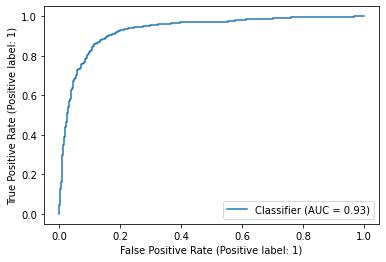

In [74]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import RocCurveDisplay

y = labels[2000:, 0]
X = train_feat_new3[2000:]
clf = HistGradientBoostingClassifier(random_state=0)
clf.fit(X, y)

y_pred = clf.predict_proba(train_feat_new3[:2000])[:,1]
RocCurveDisplay.from_predictions(labels[:2000, 0], y_pred)
plt.show()

In [81]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_feat_new2)
train_feat_new3 = scaler.transform(train_feat_new2)
y = labels[:,:10]
clf = HistGradientBoostingClassifier(random_state=0)
model = MultiOutputClassifier(clf).fit(train_feat_new3, y)

In [82]:
from sklearn.metrics import roc_auc_score
X_test = train_feat_new3
y_test = labels[:,:10]

y_pred = model.predict_proba(X_test)
y_pred = np.asarray(y_pred)
y_pred = y_pred[:,:,1]
y_pred = np.transpose(y_pred)
roc_auc_score(y_test, y_pred, average=None)

array([0.97877772, 0.97752393, 0.87250042, 0.8742446 , 0.87522072,
       0.91362636, 0.97490623, 0.93940566, 0.95498011, 0.99423856])

In [83]:
scaler = StandardScaler()
scaler.fit(test_feat_new2)
test_feat_new3 = scaler.transform(test_feat_new2)

In [84]:
y_pred = model.predict_proba(test_feat_new3)
y_pred = np.asarray(y_pred)
y_pred = y_pred[:,:,1]
y_pred = np.transpose(y_pred)

i = 0
for name in ['LABEL_BaseExcess','LABEL_Fibrinogen','LABEL_AST','LABEL_Alkalinephos','LABEL_Bilirubin_total','LABEL_Lactate','LABEL_TroponinI','LABEL_SaO2','LABEL_Bilirubin_direct','LABEL_EtCO2']:
    Abgabe[name] = y_pred[:,i]
    i += 1

In [86]:
Abgabe
#ist das korrekt oder müsste es eine 0/1 klassifizierung sein?

,pid,LABEL_BaseExcess,LABEL_Fibrinogen,LABEL_AST,LABEL_Alkalinephos,LABEL_Bilirubin_total,LABEL_Lactate,LABEL_TroponinI,LABEL_SaO2,LABEL_Bilirubin_direct,LABEL_EtCO2
0,0,0.929136,0.230198,0.838881,0.835073,0.933307,0.623155,0.008463,0.350367,0.513928,0.001363
1,10001,0.024739,0.120193,0.324143,0.475942,0.365938,0.065191,0.037247,0.044917,0.048826,0.020801
2,10003,0.025009,0.098006,0.132367,0.123882,0.097159,0.293268,0.033835,0.520401,0.024021,0.007335
3,10004,0.039691,0.251995,0.351806,0.244735,0.268242,0.069004,0.030654,0.048293,0.029640,0.045116
4,10005,0.153051,0.159679,0.170012,0.111254,0.152548,0.083609,0.003995,0.082542,0.024397,0.000659
...,...,...,...,...,...,...,...,...,...,...,...
12659,9989,0.573234,0.745438,0.111865,0.114728,0.137010,0.410648,0.003247,0.135372,0.019824,0.000601
12660,9991,0.964048,0.123848,0.254083,0.143405,0.234671,0.216666,0.014286,0.281427,0.032350,0.000906
12661,9992,0.522443,0.108347,0.122210,0.079932,0.101020,0.197987,0.010283,0.593176,0.016169,0.001949
12662,9994,0.992488,0.510001,0.916900,0.802136,0.837937,0.967434,0.115871,0.979220,0.090645,0.001631


Try Again with Median Imputer

In [149]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_feat_new2MEDIAN)
train_feat_new3MEDIAN = scaler.transform(train_feat_new2MEDIAN)train_feat_new3MEDIAN

In [150]:
from sklearn.metrics import roc_auc_score
from sklearn.multioutput import MultiOutputClassifier
y = labels[:,:10]
model = MultiOutputClassifier(clf).fit(train_feat_new3MEDIAN, y)

X_test = train_feat_new3MEDIAN
y_test = labels[:,:10]

y_pred = model.predict_proba(X_test)
y_pred = np.asarray(y_pred)
y_pred = y_pred[:,:,1]
y_pred = np.transpose(y_pred)
roc_auc_score(y_test, y_pred, average=None)

array([0.96902953, 0.95241745, 0.85213777, 0.86528451, 0.86263368,
       0.93832962, 0.97922002, 0.91452791, 0.96305446, 0.99315386])

Subtask 2
---


In [90]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0, class_weight="balanced")
model2 = svm.SVC(random_state=0, class_weight="balanced")
cross_val_score(clf, train_feat_regroupNP, labels[:,10],  cv=10)

array([0.88842105, 0.86947368, 0.88      , 0.88052632, 0.87684211,
       0.87045814, 0.87835703, 0.87414429, 0.87730384, 0.87625066])

In [91]:
clf.fit(train_feat_regroupNP[1000:], labels[1000:,10])


DecisionTreeClassifier(class_weight='balanced', random_state=0)

In [92]:
model2.fit(train_feat_regroupNP[1000:], labels[1000:,10])

SVC(class_weight='balanced', random_state=0)

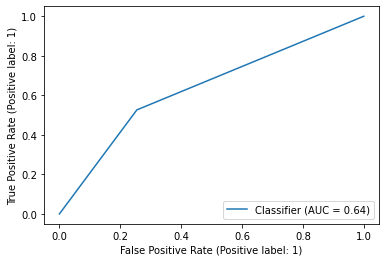

In [99]:
from sklearn.metrics import RocCurveDisplay
y_pred = model2.predict(train_feat_regroupNP[:1000])
RocCurveDisplay.from_predictions(labels[:1000,10], y_pred)
plt.show()

try with more features and HistGradientBoostingClassifier

[0.53037918 8.72931985]


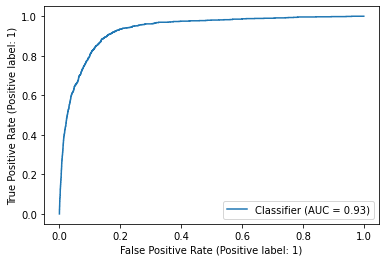

In [88]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.utils.class_weight import compute_class_weight


#y = labels[2000:, 10]
y = labels[:, 10]
wheights = compute_class_weight(class_weight="balanced", classes= [0,1], y=y)
print(wheights)
wheights_data = []
for i in range(18995):
    if y[i] == 0.0:
        wheights_data.append(wheights[0])
    else:
        wheights_data.append(wheights[1])
#print(wheights_data)

#X = train_feat_new3[2000:]
X = train_feat_new3
clf = HistGradientBoostingClassifier(random_state=0)
clf.fit(X, y, sample_weight =wheights_data)

#y_pred = clf.predict_proba(train_feat_new3[:2000])[:,1]
#RocCurveDisplay.from_predictions(labels[:2000, 10], y_pred)
y_pred = clf.predict_proba(train_feat_new3)[:,1]
RocCurveDisplay.from_predictions(labels[:, 10], y_pred) #ust for training to look how good it really is use test/train split
plt.show()

In [89]:
y_pred = clf.predict_proba(test_feat_new3)[:,1]

i = 0
for name in ['LABEL_Sepsis']:
    Abgabe[name] = y_pred
    i += 1

In [90]:
Abgabe

,pid,LABEL_BaseExcess,LABEL_Fibrinogen,LABEL_AST,LABEL_Alkalinephos,LABEL_Bilirubin_total,LABEL_Lactate,LABEL_TroponinI,LABEL_SaO2,LABEL_Bilirubin_direct,LABEL_EtCO2,LABEL_Sepsis
0,0,0.929136,0.230198,0.838881,0.835073,0.933307,0.623155,0.008463,0.350367,0.513928,0.001363,0.592390
1,10001,0.024739,0.120193,0.324143,0.475942,0.365938,0.065191,0.037247,0.044917,0.048826,0.020801,0.156507
2,10003,0.025009,0.098006,0.132367,0.123882,0.097159,0.293268,0.033835,0.520401,0.024021,0.007335,0.186103
3,10004,0.039691,0.251995,0.351806,0.244735,0.268242,0.069004,0.030654,0.048293,0.029640,0.045116,0.243421
4,10005,0.153051,0.159679,0.170012,0.111254,0.152548,0.083609,0.003995,0.082542,0.024397,0.000659,0.150893
...,...,...,...,...,...,...,...,...,...,...,...,...
12659,9989,0.573234,0.745438,0.111865,0.114728,0.137010,0.410648,0.003247,0.135372,0.019824,0.000601,0.367263
12660,9991,0.964048,0.123848,0.254083,0.143405,0.234671,0.216666,0.014286,0.281427,0.032350,0.000906,0.602564
12661,9992,0.522443,0.108347,0.122210,0.079932,0.101020,0.197987,0.010283,0.593176,0.016169,0.001949,0.333178
12662,9994,0.992488,0.510001,0.916900,0.802136,0.837937,0.967434,0.115871,0.979220,0.090645,0.001631,0.723308


Againg with Median Imputing

[0.53009981 8.80569948]


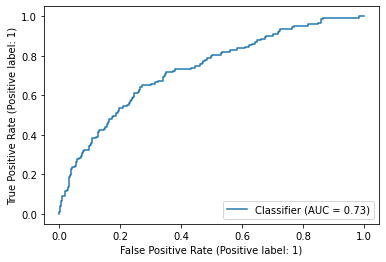

In [151]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.utils.class_weight import compute_class_weight


y = labels[2000:, 10]
wheights = compute_class_weight(class_weight="balanced", classes= [0,1], y=y)
print(wheights)
wheights_data = []
for i in range(16995):
    if y[i] == 0.0:
        wheights_data.append(wheights[0])
    else:
        wheights_data.append(wheights[1])
#print(wheights_data)

X = train_feat_new3MEDIAN[2000:]
clf = HistGradientBoostingClassifier(random_state=0)
clf.fit(X, y, sample_weight =wheights_data)

y_pred = clf.predict_proba(train_feat_new3MEDIAN[:2000])[:,1]
RocCurveDisplay.from_predictions(labels[:2000, 10], y_pred)
plt.show()

Subtask 3
---

Idee: linear model mit convolution (CNN) der 4 Werte und summe der Tests. Imputing 4 Werte mit durchschnitt zwischen zwei.

In [92]:
addi_feat = train_feat[['Heartrate','ABPs', 'SpO2' , 'RRate']].to_numpy
addi_feat

<bound method DataFrame.to_numpy of         Heartrate   ABPs   SpO2  RRate
0            94.0  142.0  100.0   16.0
1            99.0  125.0  100.0   16.0
2            92.0  110.0  100.0   18.0
3            88.0  104.0  100.0   18.0
4            81.0  100.0  100.0   18.0
...           ...    ...    ...    ...
172879       71.0  127.0   96.0    NaN
172880        NaN    NaN    NaN    NaN
172881        NaN    NaN    NaN    NaN
172882       71.0  135.0   96.0    NaN
172883       71.0  135.0   96.0    NaN

[227940 rows x 4 columns]>

In [89]:
train_feat[['Heartrate','ABPs', 'SpO2' , 'RRate']]

,Heartrate,ABPs,SpO2,RRate
0,94.0,142.0,100.0,16.0
1,99.0,125.0,100.0,16.0
2,92.0,110.0,100.0,18.0
3,88.0,104.0,100.0,18.0
4,81.0,100.0,100.0,18.0
...,...,...,...,...
172879,71.0,127.0,96.0,NaN
172880,NaN,NaN,NaN,NaN
172881,NaN,NaN,NaN,NaN
172882,71.0,135.0,96.0,NaN


In [158]:
tf2 = train_feat.interpolate(method='linear', limit_direction="both")
tf2

,pid,Time,Age,EtCO2,PTT,BUN,Lactate,Temp,Hgb,HCO3,...,Alkalinephos,SpO2,Bilirubin_direct,Chloride,Hct,Heartrate,Bilirubin_total,TroponinI,ABPs,pH
0,1,3,34.0,54.0,31.8,12.0,1.8,36.0,8.700,24.00,...,130.0,100.0,0.1,114.000,24.60,94.0,0.6,0.44,142.000000,7.33
1,1,4,34.0,54.0,31.8,12.0,1.8,36.0,8.675,24.25,...,130.0,100.0,0.1,113.625,24.05,99.0,0.6,0.44,125.000000,7.33
2,1,5,34.0,54.0,31.8,12.0,1.8,36.0,8.650,24.50,...,130.0,100.0,0.1,113.250,23.50,92.0,0.6,0.44,110.000000,7.37
3,1,6,34.0,54.0,31.8,12.0,1.8,37.0,8.625,24.75,...,130.0,100.0,0.1,112.875,22.95,88.0,0.6,0.44,104.000000,7.37
4,1,7,34.0,54.0,31.8,12.0,1.8,37.0,8.600,25.00,...,130.0,100.0,0.1,112.500,22.40,81.0,0.6,0.44,100.000000,7.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172879,31658,8,60.0,32.5,25.8,13.0,1.3,37.0,14.400,24.00,...,735.0,96.0,0.2,97.000,40.20,71.0,1.7,0.01,127.000000,7.33
172880,31658,9,60.0,32.5,25.8,13.0,1.3,37.0,14.400,24.00,...,735.0,96.0,0.2,97.000,40.20,71.0,1.7,0.01,129.666667,7.33
172881,31658,10,60.0,32.5,25.8,13.0,1.3,37.0,14.400,24.00,...,735.0,96.0,0.2,97.000,40.20,71.0,1.7,0.01,132.333333,7.33
172882,31658,11,60.0,32.5,25.8,13.0,1.3,37.0,14.400,24.00,...,735.0,96.0,0.2,97.000,40.20,71.0,1.7,0.01,135.000000,7.33


In [357]:
tfH = (tf2.groupby(['pid'])['Heartrate']).apply(list).reset_index()
tfH.pop("pid")
tfA = tf2.groupby(['pid'])['ABPs'].apply(list).reset_index()
tfA.pop("pid")
tfS = tf2.groupby(['pid'])['SpO2'].apply(list).reset_index()
tfS.pop("pid")
tfR = tf2.groupby(['pid'])['RRate'].apply(list).reset_index()
tfR.pop("pid")

tfH = tfH.to_numpy()
tfA = tfA.to_numpy()
tfS = tfS.to_numpy()
tfR = tfR.to_numpy()

tf = np.concatenate((tfH, tfA, tfS, tfR), axis=1)
tf.shape

(18995, 4)

In [359]:
tf = tf.tolist()
tf = np.asarray(tf)
tf.shape

(18995, 4, 12)

In [122]:
#df['ABPs'].interpolate(method='linear', inplace=True, limit_direction="both")

In [360]:
fulltfNP = np.empty((18995,0))
for name, values in tf2.iteritems():
    print(name)
    if(name == 'pid' or name == 'Time' or name == 'Age'):
        continue
    
    nparr = tf2.groupby(['pid'])[name].apply(list).reset_index()
    nparr.pop("pid")
    nparr = nparr.to_numpy()
    #print(fulltfNP.shape)
    #print(nparr.shape)
    fulltfNP = np.concatenate((fulltfNP, nparr), axis=1)

fulltf = fulltfNP.tolist()
fulltf = np.asarray(fulltf)
fulltf.shape

pid
Time
Age
EtCO2
PTT
BUN
Lactate
Temp
Hgb
HCO3
BaseExcess
RRate
Fibrinogen
Phosphate
WBC
Creatinine
PaCO2
AST
FiO2
Platelets
SaO2
Glucose
ABPm
Magnesium
Potassium
ABPd
Calcium
Alkalinephos
SpO2
Bilirubin_direct
Chloride
Hct
Heartrate
Bilirubin_total
TroponinI
ABPs
pH


(18995, 34, 12)

Model

In [366]:
class CNNfull(nn.Module):
    def __init__(self, out_Dim):
        super(CNNfull, self).__init__()
        
        self.conv1 = nn.Conv1d(34, 64, kernel_size=3, stride=2, padding=1)  # 12 x 1
        self.conv2 = nn.Conv1d(64, 128, kernel_size=2, stride=2, padding=1)  # 6 x 1 -> 4x1
        self.conv3 = nn.Conv1d(128, 128, kernel_size=3, stride=2, padding=1)  # 4 x 1 -> 2x1
        
        self.lin0 = nn.Linear(in_features=256, out_features=1024)
        self.lin1 = nn.Linear(in_features=1024, out_features=out_Dim)
        
        self.act = nn.ReLU(inplace=True)
        
 
    def forward(self, x):
        #print(f"inp conv: {x.size()}")
        x = self.conv1(x)
        #print(f"conv1: {x.size()}")
        x = self.act(x)
        x = self.conv2(x)
        #print(f"conv2: {x.size()}")
        x = self.act(x)
        x = self.act(self.conv3(x)).view(-1, 256)
        #print(f"conv3: {x.size()}")
        x = self.act(self.lin0(x))
        values = self.act(self.lin1(x))
        return values

In [309]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        self.conv1 = nn.Conv1d(4, 32, kernel_size=3, stride=2, padding=1)  # 12 x 1
        self.conv2 = nn.Conv1d(32, 32, kernel_size=2, stride=2, padding=1)  # 6 x 1 -> 4x1
        self.conv3 = nn.Conv1d(32, 32, kernel_size=3, stride=2, padding=1)  # 4 x 1 -> 2x1
        
        self.act = nn.ReLU(inplace=True)
        
 
    def forward(self, x):
        #print(f"inp conv: {x.size()}")
        x = self.conv1(x)
        #print(f"conv1: {x.size()}")
        x = self.act(x)
        x = self.conv2(x)
        #print(f"conv2: {x.size()}")
        x = self.act(x)
        values = self.act(self.conv3(x))
        #print(f"conv3: {values.size()}")
        return values

In [328]:
class Net(nn.Module):
    def __init__(self, in_Dim, out_Dim):
        super(Net, self).__init__()
        
        self.cnn = CNN()
        
        self.lin0 = nn.Linear(in_features=in_Dim, out_features=1024)
        self.lin1 = nn.Linear(in_features=1024, out_features=out_Dim)
        
        self.act = nn.ReLU(inplace=True)

        
    def forward(self, x4, xRest):
        
        c = self.cnn(x4).view(-1, 64)
        #print(f"c: {c.size()}")
        x = torch.cat((xRest, c), axis=1)
        x = self.lin0(x)
        x = self.act(x)
        return self.lin1(x)


In [329]:
epochs = 12
batch_size = 64
lr = 0.0001
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [367]:
#model = Net(94, 1).to(device) #labels.shape[1] ).to(device)
model = CNNfull(1).to(device)
print(model)

CNNfull(
  (conv1): Conv1d(34, 64, kernel_size=(3,), stride=(2,), padding=(1,))
  (conv2): Conv1d(64, 128, kernel_size=(2,), stride=(2,), padding=(1,))
  (conv3): Conv1d(128, 128, kernel_size=(3,), stride=(2,), padding=(1,))
  (lin0): Linear(in_features=256, out_features=1024, bias=True)
  (lin1): Linear(in_features=1024, out_features=1, bias=True)
  (act): ReLU(inplace=True)
)


In [368]:
opt = optim.Adam(model.parameters(), lr=lr)
loss = nn.MSELoss()

In [276]:
y = labels[:, -1] #try to predict one label (heartrate)

In [300]:
train_data4 = tf[:-2000]
val_data4 = tf[-2000:]

train_data = train_feat_regroup.loc[ : , train_feat_regroup.columns != 'Heartrate']
train_data = train_data.loc[ : , train_data.columns != 'ABPs']
train_data = train_data.loc[ : , train_data.columns != 'SpO2']
train_data = train_data.loc[ : , train_data.columns != 'RRate'].to_numpy()
train_dataRest = train_data[:-2000]
val_dataRest = train_data[-2000:]
print(len(train_data4))
print(len(train_dataRest))


train_data4 = train_data4.astype(dtype=np.float32)
val_data4 = val_data4.astype(dtype=np.float32)
train_dataRest = train_dataRest.astype(dtype=np.float32)
val_dataRest = val_dataRest.astype(dtype=np.float32)

y = y.astype(dtype=np.float32)
print(train_data4.dtype)
print(val_data4.dtype)

16995
16995
float32
float32


In [267]:
def fit(model, X4, XRest, labels, loss):
    X4.to(device)
    XRest.to(device)
    labels.to(device)
    model.train
    running_loss = 0.0
    indexEnd = 64
    indexStart = 0
    train_loss = []
   
    while (True):
        X4t = X4[indexStart:indexEnd]
        XRestt = XRest[indexStart:indexEnd]
        #print(f"X4: {X4t.size()}")
        #print(f"XRestt: {XRestt.size()}")
        
        opt.zero_grad()

        inp = model(X4t, XRestt)        

        output = loss(inp, labels)

        #running_loss += output.item()
        output.backward()
        train_loss.append(output.item())
        #for param in model.parameters():    
            #param.grad = torch.nan_to_num(param.grad, nan=0.0, posinf=None, neginf=None)
            #print(param.grad)

        opt.step()
        
        
        if(not(indexEnd < XRest.size(0)-1)):
            break;
        indexEnd += 64
        indexStart += 64
        indexEnd = min(indexEnd, XRest.size(0)-1)
        
    
    return np.array(train_loss).mean()

In [374]:
def validate(model, X4, XRest, labels, loss):
    X4.to(device)
    XRest.to(device)
    labels.to(device)
    model.eval()
    running_loss = 0.0
    val_loss = []
    
    with torch.no_grad():
        #for i in range(len(labels)):
       
        opt.zero_grad()

        inp = model(X4, XRest)        

        output = loss(inp, labels)

        #running_loss += output.item()
        val_loss.append(output.item())
        
    return np.array(val_loss).mean()

In [327]:
train_loss = []
val_loss = []
torch.backends.cudnn.benchmark = True #choose best kernel for computation

for epoch in range(epochs):
    print(f"Epoch {epoch+1} of {epochs}")

    train_epoch_loss = fit(model, torch.from_numpy(train_data4), torch.from_numpy(train_dataRest), torch.from_numpy(y[:-2000]), loss)
    val_epoch_loss = validate(model, torch.from_numpy(val_data4), torch.from_numpy(val_dataRest), torch.from_numpy(y[-2000:]), loss)
    
    train_loss.append(train_epoch_loss)
    val_loss.append(val_epoch_loss)
    print(f"Train Loss: {train_epoch_loss:.4f}")
    print(f"Val Loss: {val_epoch_loss:.4f}")

Epoch 1 of 12
Train Loss: 798.2659
Val Loss: 238.9456
Epoch 2 of 12
Train Loss: 221.0392
Val Loss: 228.9156
Epoch 3 of 12
Train Loss: 218.9684
Val Loss: 228.3723
Epoch 4 of 12
Train Loss: 218.6525
Val Loss: 228.0455
Epoch 5 of 12
Train Loss: 218.5104
Val Loss: 227.9013
Epoch 6 of 12
Train Loss: 218.4388
Val Loss: 227.8095
Epoch 7 of 12
Train Loss: 218.3901
Val Loss: 227.7431
Epoch 8 of 12
Train Loss: 218.3480
Val Loss: 227.6931
Epoch 9 of 12
Train Loss: 218.3105
Val Loss: 227.6494
Epoch 10 of 12
Train Loss: 218.2874
Val Loss: 227.6235
Epoch 11 of 12
Train Loss: 218.2616
Val Loss: 227.6500
Epoch 12 of 12
Train Loss: 218.2241
Val Loss: 227.6834


In [333]:
testIndex = 10
testData4, testDataRest = torch.from_numpy(train_data4[testIndex]), torch.from_numpy(train_dataRest[testIndex])
testData4, testDataRest = testData4[None,:,:], testDataRest[None,:]
#print(testData4.size())
inp = model(testData4, testDataRest) 
print(f"inp: {inp}")
print(f"groundtruth: {y[testIndex]}")

inp: tensor([[0.9632]], grad_fn=<AddmmBackward>)
groundtruth: 67.80000305175781


In [369]:
train_dataFull = fulltf[:-2000]
val_dataFull = fulltf[-2000:]
train_dataFull = train_dataFull.astype(dtype=np.float32)
val_dataFull = val_dataFull.astype(dtype=np.float32)
y = y.astype(dtype=np.float32)

In [370]:
def fitFull(model, X, labels, loss):
    X.to(device)
    labels.to(device)
    model.train
    running_loss = 0.0
    indexEnd = 64
    indexStart = 0
    train_loss = []
   
    while (True):
        Xt = X[indexStart:indexEnd]
        #print(f"X: {X.size()}")
        
        opt.zero_grad()

        inp = model(Xt)        

        output = loss(inp, labels)

        #running_loss += output.item()
        output.backward()
        train_loss.append(output.item())
        #for param in model.parameters():    
            #param.grad = torch.nan_to_num(param.grad, nan=0.0, posinf=None, neginf=None)
            #print(param.grad)

        opt.step()
        
        
        if(not(indexEnd < X.size(0)-1)):
            break;
        indexEnd += 64
        indexStart += 64
        indexEnd = min(indexEnd, X.size(0)-1)
        
    
    return np.array(train_loss).mean()

In [373]:
def validateFull(model, X, labels, loss):
    X.to(device)
    labels.to(device)
    model.eval()
    running_loss = 0.0
    val_loss = []
    
    with torch.no_grad():
        #for i in range(len(labels)):
       
        opt.zero_grad()

        inp = model(X)        

        output = loss(inp, labels)

        #running_loss += output.item()
        val_loss.append(output.item())
        
    return np.array(val_loss).mean()

In [375]:
train_loss = []
val_loss = []
torch.backends.cudnn.benchmark = True #choose best kernel for computation

for epoch in range(epochs):
    print(f"Epoch {epoch+1} of {epochs}")

    train_epoch_loss = fitFull(model, torch.from_numpy(train_dataFull), torch.from_numpy(y[:-2000]), loss)
    val_epoch_loss = validateFull(model, torch.from_numpy(val_dataFull), torch.from_numpy(y[-2000:]), loss)
    
    train_loss.append(train_epoch_loss)
    val_loss.append(val_epoch_loss)
    print(f"Train Loss: {train_epoch_loss:.4f}")
    print(f"Val Loss: {val_epoch_loss:.4f}")

Epoch 1 of 12


C:\Users\erics\anaconda3\envs\IML\lib\site-packages\torch\nn\modules\loss.py:445: UserWarning: Using a target size (torch.Size([16995])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  Examples::
C:\Users\erics\anaconda3\envs\IML\lib\site-packages\torch\nn\modules\loss.py:445: UserWarning: Using a target size (torch.Size([16995])) that is different to the input size (torch.Size([34, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  Examples::
C:\Users\erics\anaconda3\envs\IML\lib\site-packages\torch\nn\modules\loss.py:445: UserWarning: Using a target size (torch.Size([2000])) that is different to the input size (torch.Size([2000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  Examples::


Train Loss: 879.8118
Val Loss: 290.5665
Epoch 2 of 12
Train Loss: 229.5341
Val Loss: 280.3023
Epoch 3 of 12
Train Loss: 224.1591
Val Loss: 278.6355
Epoch 4 of 12
Train Loss: 222.3895
Val Loss: 280.8245
Epoch 5 of 12
Train Loss: 221.5267
Val Loss: 284.1863
Epoch 6 of 12
Train Loss: 220.9797
Val Loss: 288.8338
Epoch 7 of 12
Train Loss: 221.2283
Val Loss: 292.4528
Epoch 8 of 12
Train Loss: 220.7955
Val Loss: 297.9907
Epoch 9 of 12
Train Loss: 221.8127
Val Loss: 303.3831
Epoch 10 of 12
Train Loss: 220.2129
Val Loss: 315.0674
Epoch 11 of 12
Train Loss: 220.7041
Val Loss: 323.7655
Epoch 12 of 12
Train Loss: 220.1048
Val Loss: 332.8802


In [377]:
testIndex = 100
testData = torch.from_numpy(train_dataFull[testIndex])
testData = testData[None,:]
#print(testData4.size())
inp = model(testData) 
print(f"inp: {inp}")
print(f"groundtruth: {y[testIndex]}")

inp: tensor([[84.3230]], grad_fn=<ReluBackward1>)
groundtruth: 123.5


Try it again with a HistGradientBoosting 

In [91]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import r2_score
featIndex = 14

model = HistGradientBoostingRegressor(max_depth=4, random_state=0)
#y = labels[2000:, featIndex]
#X = train_feat_new2[2000:]#unscaled features #for training
y = labels[:, featIndex]
X = train_feat_new2#unscaled features
model.fit(X, y)

y_pred = model.predict(train_feat_new2[:2000])
loss = r2_score(labels[:2000, featIndex], y_pred)
loss

0.6884891614053896

make multioutput

In [92]:
from sklearn.multioutput import MultiOutputRegressor
y = labels[:,11:]
model = HistGradientBoostingRegressor(max_depth=4, random_state=0)
model = MultiOutputRegressor(model).fit(train_feat_new2, y)

In [93]:
y_pred = model.predict(train_feat_new2[:2000])
loss = r2_score(labels[:2000, 11:], y_pred, multioutput='raw_values')
loss

array([0.50551025, 0.67849746, 0.43989927, 0.68848916])

In [94]:
y_pred = model.predict(test_feat_new2)

i = 0
for name in ['LABEL_RRate','LABEL_ABPm','LABEL_SpO2','LABEL_Heartrate']:
    Abgabe[name] = y_pred[:,i]
    i += 1

In [97]:
Abgabe

,pid,LABEL_BaseExcess,LABEL_Fibrinogen,LABEL_AST,LABEL_Alkalinephos,LABEL_Bilirubin_total,LABEL_Lactate,LABEL_TroponinI,LABEL_SaO2,LABEL_Bilirubin_direct,LABEL_EtCO2,LABEL_Sepsis,LABEL_RRate,LABEL_ABPm,LABEL_SpO2,LABEL_Heartrate
0,0,0.929136,0.230198,0.838881,0.835073,0.933307,0.623155,0.008463,0.350367,0.513928,0.001363,0.592390,13.881394,82.958998,98.916238,86.385143
1,10001,0.024739,0.120193,0.324143,0.475942,0.365938,0.065191,0.037247,0.044917,0.048826,0.020801,0.156507,17.721958,88.235001,95.083771,99.960310
2,10003,0.025009,0.098006,0.132367,0.123882,0.097159,0.293268,0.033835,0.520401,0.024021,0.007335,0.186103,19.008281,79.581383,97.951946,89.820970
3,10004,0.039691,0.251995,0.351806,0.244735,0.268242,0.069004,0.030654,0.048293,0.029640,0.045116,0.243421,16.351060,73.880142,95.809262,87.409479
4,10005,0.153051,0.159679,0.170012,0.111254,0.152548,0.083609,0.003995,0.082542,0.024397,0.000659,0.150893,19.219874,73.125442,95.865156,60.980911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12659,9989,0.573234,0.745438,0.111865,0.114728,0.137010,0.410648,0.003247,0.135372,0.019824,0.000601,0.367263,20.581386,78.686212,95.643696,106.828314
12660,9991,0.964048,0.123848,0.254083,0.143405,0.234671,0.216666,0.014286,0.281427,0.032350,0.000906,0.602564,18.183068,95.785690,98.617761,74.812645
12661,9992,0.522443,0.108347,0.122210,0.079932,0.101020,0.197987,0.010283,0.593176,0.016169,0.001949,0.333178,19.329014,69.467500,96.955157,80.505825
12662,9994,0.992488,0.510001,0.916900,0.802136,0.837937,0.967434,0.115871,0.979220,0.090645,0.001631,0.723308,15.767311,91.751789,98.315892,94.880466


Same with Median Imputer

In [152]:
from sklearn.multioutput import MultiOutputRegressor
y = labels[:,11:]
model = HistGradientBoostingRegressor(max_depth=4, random_state=0)
model = MultiOutputRegressor(model).fit(train_feat_new2MEDIAN, y)

In [153]:
y_pred = model.predict(train_feat_new2MEDIAN[:2000])
loss = r2_score(labels[:2000, 11:], y_pred, multioutput='raw_values')
loss

array([0.49653467, 0.66871991, 0.43875075, 0.67803436])

Schlussforlgerung: Mit KNN Imputer und HistGradientBoosting und nicht SVM

In [96]:
import pandas as pd

# suppose df is a pandas dataframe containing the result
Abgabe.to_csv('prediction1.zip', index=False, float_format='%.3f', compression='zip')